# Project 4
## Smart Health Omdena

## Tasks

Instructions

read about human cough types - dry and wet, volunatry/ involuntary, etc. (reference: https://ieeexplore.ieee.org/document/9175986). Why cough is an important biomarker for respiratory disease? Do cough frequency vary with disease severity?

Select a sound classification dataset containing cough/ lungs/ heart sound e.g. ESC-50 dataset https://github.com/karolpiczak/ESC-50 
make a new dataset with human cough sounds in one class and 4 other types of sounds e.g. sneezing, door knocking, raining, dog barking etc. in another class 

listen to the sounds and visualize some instances/ spectogram using the software Audacity https://www.audacityteam.org/ 

label the target class audio records as cough and the other class audio records as not cough (reference: https://www.researchgate.net/publication/336011335_Efficient_Online_Cough_Detection_with_a_Minimal_Feature_Set_Using_Smartphones_for_Automated_Assessment_of_Pulmonary_Patients

split your dataset into train and test set 

develop a cough classification model using the training set and evaluate the model performance on test set

Retrain another model using the same dataset with Teachable Machine Platform

Export the model and evaluate it in python on the test data

compare your model performance with that of teachable machine

push your code to project-4 branch of the course Github and make a pull request.

## Get The data from ESC-50
### Write the code to download from github

In [1]:
## Do this only once.
!git clone https://github.com/karolpiczak/ESC-50 ./ESC50Data

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import shutil
from pathlib import Path
import matplotlib.pyplot as plt


### Extract 4 classes from ESC-50, audio files related to 4 classes - cough, rain, bark, and sneeze

In [4]:
## Extract 4 classes from ESC-50, audio files related to 4 classes - cough, rain, bark, and sneeze
SOURCE_FOLDER = './ESC50Data'
DEST_FOLDER = './Sound_dataset'
source_categories = ['coughing', 'sneezing', 'rain', 'dog']
META_INFO = './ESC50Data/meta/esc50.csv'

In [2]:
## Check if Source folder exists

audio = Path(SOURCE_FOLDER+'/audio')
meta = Path(META_INFO)
if audio.is_dir() and meta.is_file():
    Path(DEST_FOLDER).mkdir(parents=True, exist_ok=True)
    for c in source_categories:
        Path(f"{DEST_FOLDER}/{c}").mkdir(parents=True, exist_ok=True)
    
    ## Open meta file
    metacsv = pd.read_csv(META_INFO)
    for file, target in zip(metacsv.filename, metacsv.category):
        #print(f"{file} with {target}")
        if target in source_categories:
            shutil.copy(audio/file, Path(f"{DEST_FOLDER}/{target}"))

else:
    print(f"Please download data in previous cell")


C:\Users\212364~1\AppData\Local\Temp/ipykernel_27920/315479574.py:10: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  signal = np.frombuffer(signal,dtype=np.integer)


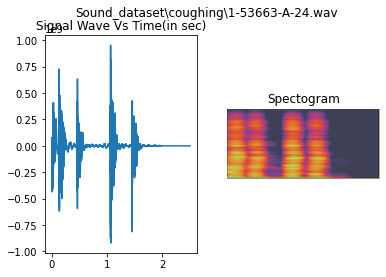

C:\Users\212364~1\AppData\Local\Temp/ipykernel_27920/315479574.py:10: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  signal = np.frombuffer(signal,dtype=np.integer)


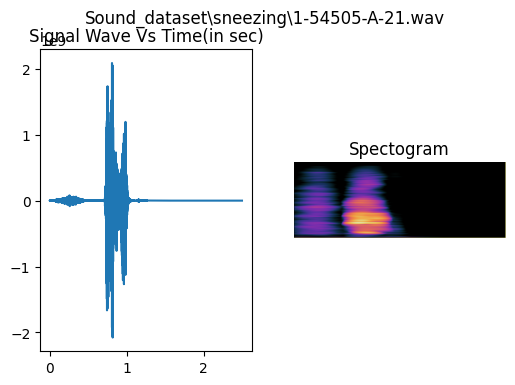

C:\Users\212364~1\AppData\Local\Temp/ipykernel_27920/315479574.py:10: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  signal = np.frombuffer(signal,dtype=np.integer)


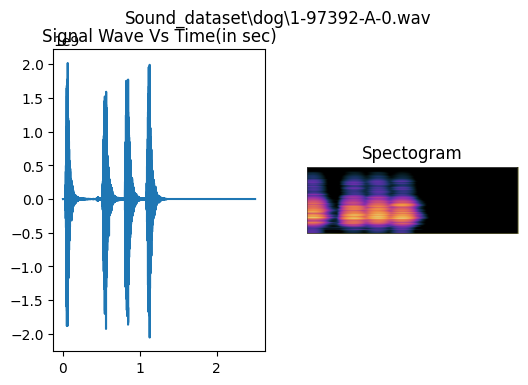

C:\Users\212364~1\AppData\Local\Temp/ipykernel_27920/315479574.py:10: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  signal = np.frombuffer(signal,dtype=np.integer)


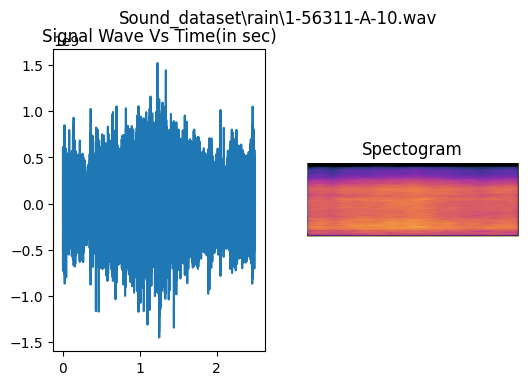

In [6]:
# visualization of a sound file
import wave
import soundfile as sf
import sys
import matplotlib.image as mpimg
def visualize_wav(wavfile, spectpath):
    _, samplerate = sf.read(str(wavfile))
    spf = wave.open(str(wavfile))
    signal = spf.readframes(-1)
    signal = np.frombuffer(signal,dtype=np.integer)
    if spf.getnchannels() == 2:
        print('just mono files. not stereo')
        sys.exit(0)
    # plotting x axis in seconds. create time vector spaced linearly     with size of audio file. divide size of signal by frame rate to get   stop limit
    Time = np.linspace(0,len(signal)/samplerate, num = len(signal))
    #plt.figure(1)
    #plt.title('Signal Wave Vs Time(in sec)')
    #plt.plot(Time, signal)
    #plt.savefig('sample_wav/sample_waveplot_Fire.png', bbox_inches='tight')

    fig, ax = plt.subplots(1,2)
    ax[0].set_title('Signal Wave Vs Time(in sec)')
    ax[0].plot(Time, signal)
    ax[1].imshow(mpimg.imread(spectpath))
    ax[1].axis('off')
    ax[1].set_title('Spectogram')
    fig.suptitle(f"{wavfile}")
    plt.rcParams['figure.dpi'] = 100
    plt.show()

# Cough
file_path=Path(f"{DEST_FOLDER}/coughing/1-53663-A-24.wav")
spect_path=Path(f"Cough_53663_A.png")
# pass to the visualization function
visualize_wav(file_path, spect_path)

file_path=Path(f"{DEST_FOLDER}/sneezing/1-54505-A-21.wav")
spect_path=Path(f"Sneeze_54505_A.png")
# pass to the visualization function
visualize_wav(file_path, spect_path)

file_path=Path(f"{DEST_FOLDER}/dog/1-97392-A-0.wav")
spect_path=Path(f"Dog_97392_A.png")
# pass to the visualization function
visualize_wav(file_path, spect_path)

file_path=Path(f"{DEST_FOLDER}/rain/1-56311-A-10.wav")
spect_path=Path(f"Rain_56311_A.png")
# pass to the visualization function
visualize_wav(file_path, spect_path)



The 4 classes of sounds have different spectogram profiles. Cough and dog's bark seems similar, however, a dog's bark has higher frequencies and also amplitude in time domain is higher. Also cough tends to be more periodic whereas a dogs bark may or maynot be.

## Extract feature from sound file for recognition
### For each of the classes we will extract the MFCC (Mel-frequency Cestrum Coefficient) features. A brief description of the extraction technique is mentioned here. 
http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/#:~:text=Mel%20Frequency%20Cepstral%20Coefficents%20%28MFCCs%29%20are%20a%20feature,the%201980%27s%2C%20and%20have%20been%20state-of-the-art%20ever%20since

In [2]:
## Extract the features from the sound files
import librosa
def get_mfcc_features(file_name):
    print(file_name)
    if file_name: 
        X, sample_rate = sf.read(file_name, dtype='float32')
    # mfcc (mel-frequency cepstrum)
    mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40)
    mfccs_scaled = np.mean(mfccs.T,axis=0)
    return mfccs_scaled

In [7]:
# feature extraction from all sound files
import glob
def extract_features(dir_name):
    sub_dirs = list(filter(Path.is_dir, Path(dir_name).iterdir()))
    sub_dirs.sort()
    features_list = []
    for label, sub_dir in enumerate(sub_dirs):  
        #print(sub_dir)
        for file_name in sub_dir.glob('*.wav'):
            #print("Extracting file ", file_name)
            try:
                mfccs = get_mfcc_features(file_name)
            except Exception as e:
                print("Extraction error")
                continue
            features_list.append([mfccs,label])
    features_df = pd.DataFrame(features_list,columns = ['feature','class_label'])
    print(features_df.head())    
    return features_df

features_df = extract_features(DEST_FOLDER)
print(features_df.tail())

Sound_dataset\coughing\1-19111-A-24.wav
Sound_dataset\coughing\1-19118-A-24.wav
Sound_dataset\coughing\1-30830-A-24.wav
Sound_dataset\coughing\1-52266-A-24.wav
Sound_dataset\coughing\1-52323-A-24.wav
Sound_dataset\coughing\1-53663-A-24.wav
Sound_dataset\coughing\1-58792-A-24.wav
Sound_dataset\coughing\1-63679-A-24.wav
Sound_dataset\coughing\2-108017-A-24.wav
Sound_dataset\coughing\2-123896-A-24.wav
Sound_dataset\coughing\2-85292-A-24.wav
Sound_dataset\coughing\2-87412-A-24.wav
Sound_dataset\coughing\2-87794-A-24.wav
Sound_dataset\coughing\2-87795-A-24.wav
Sound_dataset\coughing\2-87799-A-24.wav
Sound_dataset\coughing\2-98676-A-24.wav
Sound_dataset\coughing\3-125418-A-24.wav
Sound_dataset\coughing\3-132601-A-24.wav
Sound_dataset\coughing\3-142604-A-24.wav
Sound_dataset\coughing\3-145487-A-24.wav
Sound_dataset\coughing\3-146873-A-24.wav
Sound_dataset\coughing\3-149042-A-24.wav
Sound_dataset\coughing\3-151212-A-24.wav
Sound_dataset\coughing\3-151213-A-24.wav
Sound_dataset\coughing\4-15299

In [8]:
features_df.class_label.value_counts()

0    40
1    40
2    40
3    40
Name: class_label, dtype: int64

### Build a dataset for binary classification - cough vs no cough

### Just for experimentation - I am building 3 different datasets.
1. Balanced Dataset with Cough and Dog
2. Balanced Dataset with Cough and Not Cough, where Not Cough has equally divided classes (Dog, Sneeze, and Rain)
3. Unbalanced Dataset with Cough and Not Cough, where Not Cough has Dog, Sneeze and Rain. Not Cough totally has more data points than Cough.

In [9]:
features_Cough_Dog = features_df[features_df.class_label < 2]
features_Cough_Dog.class_label.value_counts()

0    40
1    40
Name: class_label, dtype: int64

In [10]:
features_balanced_all = features_df[features_df.class_label < 1]
features_balanced_all = features_balanced_all.append(features_df.iloc[40:53])
features_balanced_all = features_balanced_all.append(features_df.iloc[80:93])
features_balanced_all = features_balanced_all.append(features_df.iloc[120:134])
features_balanced_all['class_label'] = features_balanced_all['class_label'].replace({2:1, 3:1})
features_balanced_all.class_label.value_counts()

0    40
1    40
Name: class_label, dtype: int64

In [11]:
features_unbalanced_all = features_df.copy()
features_unbalanced_all['class_label'] = features_unbalanced_all['class_label'].replace({2:1, 3:1})
features_unbalanced_all.class_label.value_counts()

1    120
0     40
Name: class_label, dtype: int64

In [12]:
def generate_pie_plot(frame, category_list=None):
    proportions = []
    names = list(frame)
    if category_list is not None:
        #category_list = category_list.values
        names = category_list
    counts = list(frame)
    sz = sum(counts)
    for i,c in enumerate(counts):
        prop = c
        print(f"Proportion of data in class {names[i]} is {prop} : {prop/sz*100:0.2f} %")
        proportions.append(prop)

    colors = ['#003f5c', '#58508d']

    fig, ax = plt.subplots()
    ax.pie(proportions, labels=names, autopct='%1.1f%%', colors = colors, textprops={'color':"gray"})
    ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
    ax.set_title('Categories (Cough/NoCough', color='gray')

    plt.show()

## Train Models

#### Split Data into train and test data.

In [13]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import load_model

def get_train_test_data(features):
    X = np.array(features.feature.to_list())
    y = np.array(features.class_label.to_list())
    y_cat = to_categorical(y)
    X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.15, random_state=10 )
    return X_train, X_test, y_train, y_test

In [21]:
## Training and Evaluation helper functions
def train(model,X_train, X_test, y_train, y_test,model_file, weight=False):    
    # compile the model 
    model.compile(loss = 'categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
    print(model.summary())
    print("training for 150 epochs")
    weights = {0:(136/(2*34)), 1:(136/(2*102))}
    if weight == False:
        history = model.fit(X_train,y_train, epochs = 150, validation_data=(X_test,y_test))
    else:
        history = model.fit(X_train,y_train, epochs = 150, class_weight=weights, validation_data=(X_test,y_test))
    # save model to disk
    print("Saving model to disk")
    model.save(model_file)
    return history

def compute(X_test,y_test,model_file):
    # load model from disk
    loaded_model = load_model(model_file)
    score = loaded_model.evaluate(X_test,y_test)
    return score[0],score[1]*100

In [15]:
from sklearn.metrics import accuracy_score

def Accuracy_ConfusionMatrix(testX, testY, categories, model_file):
    model = load_model(model_file)
    y_predicted= model.predict(testX) 
    y_predicted = np.argmax(y_predicted, axis=1)
    testY = np.argmax(testY, axis=1)
    print(f"Accuracy of the model is {accuracy_score(testY, y_predicted)}")
    confusion_matrix = pd.crosstab(testY, y_predicted, rownames=['Actual'], colnames=['Predicted'])
    print(confusion_matrix)
    print("Sensitivity of model for individual classes")
    class_sum = np.sum(confusion_matrix, axis=1)
    for c,i in enumerate(categories):
        #print(f"{c} {i}")
        print(f"Class {i} : {confusion_matrix[c][c]/class_sum[c]}")

    

#### Artificial Neural Network

In [16]:
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential

In [17]:
def create_ann_model(num_labels):
    model = Sequential()
    model.add(Dense(256,input_shape = (40,)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_labels))
    model.add(Activation('softmax'))
    return model

### Train using Cough and Dog Data

Proportion of data in class Cough is 34 : 50.00 %
Proportion of data in class Not Cough is 34 : 50.00 %


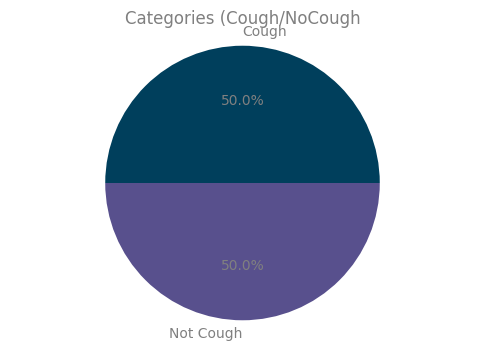

Proportion of data in class Cough is 6 : 50.00 %
Proportion of data in class Not Cough is 6 : 50.00 %


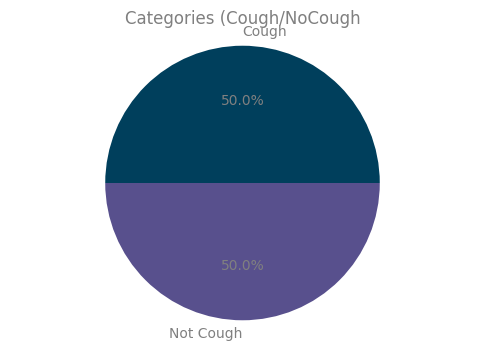

Training..
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               10496     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
 activation_1 (Activation)   (None, 2)                 0         
                                                                 
Total params: 11,010
Trainable params: 11,010
Non-trainable params: 0
_________________________________________________________________
None
training for 150 epochs
Epoch 1/150


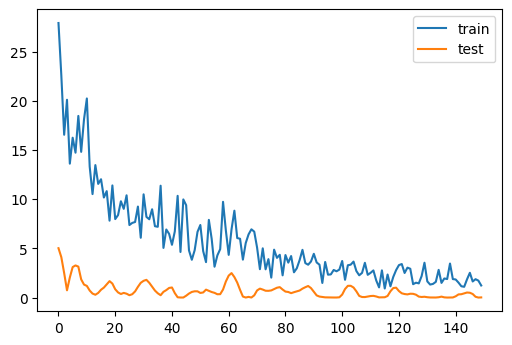

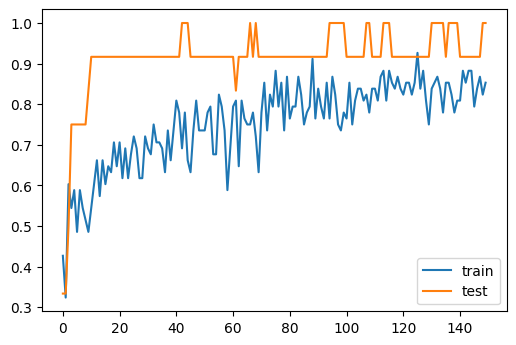

In [18]:
X_train, X_test, y_train, y_test = get_train_test_data(features_Cough_Dog)
generate_pie_plot(np.bincount(y_train), ['Cough', 'Not Cough'])
generate_pie_plot(np.bincount(y_test), ['Cough', 'Not Cough'])

y_train_e = to_categorical(y_train)
y_test_e = to_categorical(y_test)
num_labels = y_train_e.shape[1]

# create model architecture
model = create_ann_model(num_labels)

# train model
print("Training..")
history = train(model,X_train, X_test, y_train_e, y_test_e,"trained_ann.h5")

#compute Train loss and accuracy
train_loss, train_accuracy = compute(X_train,y_train_e,"trained_ann.h5")
print("Train loss",train_loss)
print("Train accuracy",train_accuracy)

# compute test loss and accuracy
test_loss, test_accuracy = compute(X_test,y_test_e,"trained_ann.h5")
print("Test loss",test_loss)
print("Test accuracy",test_accuracy)

Accuracy_ConfusionMatrix(X_test, y_test_e, ['Cough', 'NotCough'], "trained_ann.h5")

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# plot training history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

### Train on Balanced data

Proportion of data in class Cough is 34 : 50.00 %
Proportion of data in class Not Cough is 34 : 50.00 %


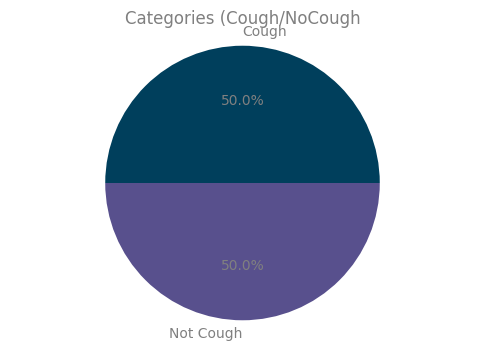

Proportion of data in class Cough is 6 : 50.00 %
Proportion of data in class Not Cough is 6 : 50.00 %


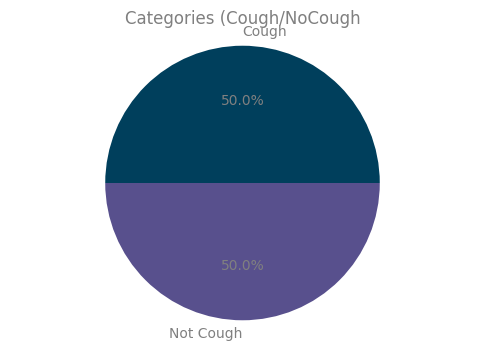

Training..
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               10496     
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 514       
                                                                 
 activation_3 (Activation)   (None, 2)                 0         
                                                                 
Total params: 11,010
Trainable params: 11,010
Non-trainable params: 0
_________________________________________________________________
None
training for 150 epochs
Epoch 1/15

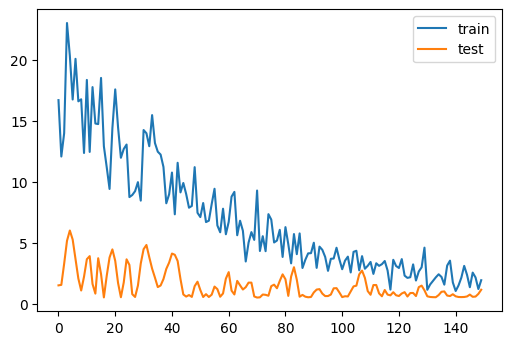

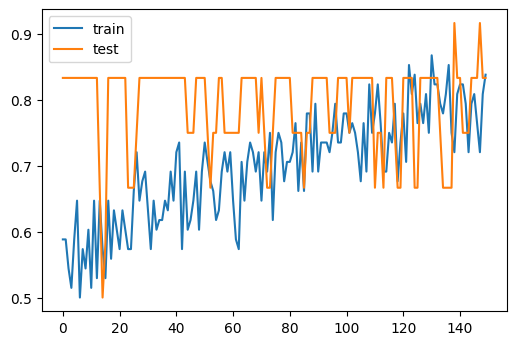

In [19]:
X_train, X_test, y_train, y_test = get_train_test_data(features_balanced_all)
generate_pie_plot(np.bincount(y_train), ['Cough', 'Not Cough'])
generate_pie_plot(np.bincount(y_test), ['Cough', 'Not Cough'])

y_train_e = to_categorical(y_train)
y_test_e = to_categorical(y_test)
num_labels = y_train_e.shape[1]

# create model architecture
model = create_ann_model(num_labels)

# train model
print("Training..")
history = train(model,X_train, X_test, y_train_e, y_test_e,"trained_ann.h5")

#compute Train loss and accuracy
train_loss, train_accuracy = compute(X_train,y_train_e,"trained_ann.h5")
print("Train loss",train_loss)
print("Train accuracy",train_accuracy)

# compute test loss and accuracy
test_loss, test_accuracy = compute(X_test,y_test_e,"trained_ann.h5")
print("Test loss",test_loss)
print("Test accuracy",test_accuracy)

Accuracy_ConfusionMatrix(X_test, y_test_e, ['Cough', 'NotCough'], "trained_ann.h5")

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# plot training history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

### Train on unbalanced data

Proportion of data in class Cough is 34 : 25.00 %
Proportion of data in class Not Cough is 102 : 75.00 %


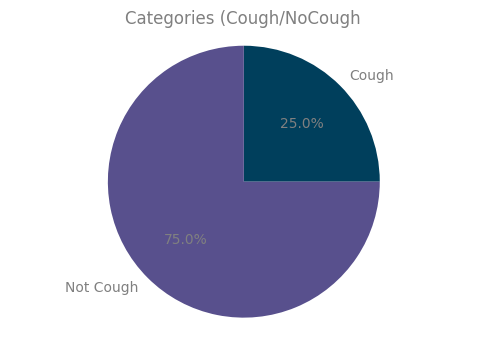

Proportion of data in class Cough is 6 : 25.00 %
Proportion of data in class Not Cough is 18 : 75.00 %


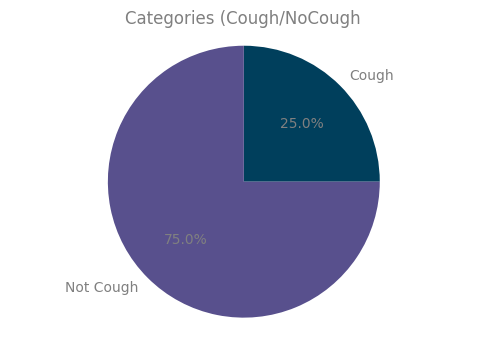

Training..
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               10496     
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 514       
                                                                 
 activation_5 (Activation)   (None, 2)                 0         
                                                                 
Total params: 11,010
Trainable params: 11,010
Non-trainable params: 0
_________________________________________________________________
None
training for 150 epochs
Epoch 1/15

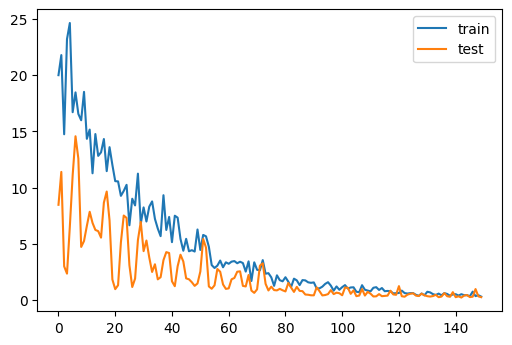

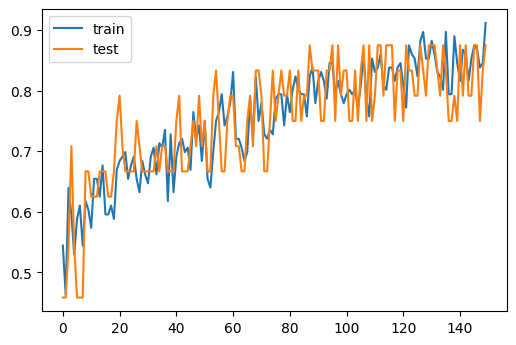

In [22]:
X_train, X_test, y_train, y_test = get_train_test_data(features_unbalanced_all)
generate_pie_plot(np.bincount(y_train), ['Cough', 'Not Cough'])
generate_pie_plot(np.bincount(y_test), ['Cough', 'Not Cough'])

y_train_e = to_categorical(y_train)
y_test_e = to_categorical(y_test)
num_labels = y_train_e.shape[1]

# create model architecture
model = create_ann_model(num_labels)

# train model
print("Training..")
history = train(model,X_train, X_test, y_train_e, y_test_e,"trained_ann.h5", weight=True)

#compute Train loss and accuracy
train_loss, train_accuracy = compute(X_train,y_train_e,"trained_ann.h5")
print("Train loss",train_loss)
print("Train accuracy",train_accuracy)

# compute test loss and accuracy
test_loss, test_accuracy = compute(X_test,y_test_e,"trained_ann.h5")
print("Test loss",test_loss)
print("Test accuracy",test_accuracy)

Accuracy_ConfusionMatrix(X_test, y_test_e, ['Cough', 'NotCough'], "trained_ann.h5")

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# plot training history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

Print the precision and recall for the unbalanced case.

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score

def Imbalanced_metrics(testX, testY, categories, model_file):
    model = load_model(model_file)
    y_predicted= model.predict(testX) 
    y_predicted = np.argmax(y_predicted, axis=1)
    testY = np.argmax(testY, axis=1)

    # calculate prediction
    precision = precision_score(testY, y_predicted, average='binary')
    print('Precision: %.3f' % precision)
    # calculate recall
    recall = recall_score(testY, y_predicted, average='binary')
    print('Recall: %.3f' % recall)
    # calculate score
    score = f1_score(testY, y_predicted, labels=categories, average='binary')
    print('F-Measure: %.3f' % score)


In [28]:
Imbalanced_metrics(X_test, y_test_e, ['Cough', 'NotCough'], "trained_ann.h5")

Precision: 0.895
Recall: 0.944
F-Measure: 0.919


In [78]:
# Training data
Imbalanced_metrics(X_train, y_train_e, ['Cough', 'NotCough'], "trained_ann.h5")

Precision: 0.935
Recall: 0.990
F-Measure: 0.962


The Artifical Neural Network seems to give a good performance on the data. 

## Random Forest

In [35]:
def Accuracy_ConfusionMatrix_sklearn(model, X_test, y_test, categories):
    y_predicted= model.predict(X_test)
    print(f"Accuracy on the Logistic Regression is {accuracy_score(y_test, y_predicted)}")
    confusion_matrix = pd.crosstab(y_test, y_predicted, rownames=['Actual'], colnames=['Predicted'])
    print(confusion_matrix)
    print("Sensitivity of model for individual classes")
    class_sum = np.sum(confusion_matrix, axis=1)
    for c in categories:
        print(f"Class {c} : {confusion_matrix[c][c]/class_sum[c]}")

    # calculate prediction
    precision = precision_score(y_test, y_predicted, average='binary')
    print('Precision: %.3f' % precision)
    # calculate recall
    recall = recall_score(y_test, y_predicted, average='binary')
    print('Recall: %.3f' % recall)
    # calculate score
    score = f1_score(y_test, y_predicted, labels=categories, average='binary')
    print('F-Measure: %.3f' % score)

In [39]:
# check performance for ensemble models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
X_train, X_test, y_train, y_test = get_train_test_data(features_balanced_all)

y_train_e = to_categorical(y_train)
y_test_e = to_categorical(y_test)

RanForestModel = RandomForestClassifier() 
RanForestModel.fit(X_train, y_train)

## For Training data
Accuracy_ConfusionMatrix_sklearn(RanForestModel, X_train, y_train, [0, 1])

## For test Data
Accuracy_ConfusionMatrix_sklearn(RanForestModel, X_test, y_test, [0, 1])

Accuracy on the Logistic Regression is 1.0
Predicted   0   1
Actual           
0          34   0
1           0  34
Sensitivity of model for individual classes
Class 0 : 1.0
Class 1 : 1.0
Precision: 1.000
Recall: 1.000
F-Measure: 1.000
Accuracy on the Logistic Regression is 0.9166666666666666
Predicted  0  1
Actual         
0          6  0
1          1  5
Sensitivity of model for individual classes
Class 0 : 1.0
Class 1 : 0.8333333333333334
Precision: 1.000
Recall: 0.833
F-Measure: 0.909


In [41]:
# check performance for ensemble models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
X_train, X_test, y_train, y_test = get_train_test_data(features_unbalanced_all)

y_train_e = to_categorical(y_train)
y_test_e = to_categorical(y_test)

RanForestModel = RandomForestClassifier() 
RanForestModel.fit(X_train, y_train)

Accuracy_ConfusionMatrix_sklearn(RanForestModel, X_train, y_train, [0, 1])
Accuracy_ConfusionMatrix_sklearn(RanForestModel, X_test, y_test, [0, 1])


Accuracy on the Logistic Regression is 1.0
Predicted   0    1
Actual            
0          34    0
1           0  102
Sensitivity of model for individual classes
Class 0 : 1.0
Class 1 : 1.0
Precision: 1.000
Recall: 1.000
F-Measure: 1.000
Accuracy on the Logistic Regression is 0.7916666666666666
Predicted  0   1
Actual          
0          1   5
1          0  18
Sensitivity of model for individual classes
Class 0 : 0.16666666666666666
Class 1 : 1.0
Precision: 0.783
Recall: 1.000
F-Measure: 0.878


RandomForest has a good performance on Balanced test data. However, the performance suffers on Unbalanced test data. 

## Teachable Machine

In [61]:
import librosa.display
import glob
def save_spectogram_as_png(dir_name):
    sub_dirs = list(filter(Path.is_dir, Path(dir_name).iterdir()))
    sub_dirs.sort()
    features_list = []
    for label, sub_dir in enumerate(sub_dirs):  
        #print(sub_dir)
        for file_name in sub_dir.glob('*.wav'):
            x1, sr1 = librosa.load(file_name, sr=44100)
            X1 = librosa.stft(x1)
            Xdb1 = librosa.amplitude_to_db(abs(X1)) 
            file_name = Path(str(file_name).replace('wav','png'))
            plt.imsave(file_name, Xdb1)

save_spectogram_as_png(DEST_FOLDER)

#### The spectograms were uploaded to Teachable Machine and trained using the image models.

In [72]:
from PIL import Image, ImageOps
model = load_model('keras_model.h5')

In [77]:
def check_accuracy(dir_name):
    sub_dirs = list(filter(Path.is_dir, Path(dir_name).iterdir()))
    sub_dirs.sort()
    p = [0, 0]
    for label, sub_dir in enumerate(sub_dirs):  
        #print(sub_dir)
        for file_name in sub_dir.glob('*.png'):
            data = np.ndarray(shape=(1,224,224,3), dtype=np.float32)
            image = Image.open(file_name)
            size=(224,224)
            image = ImageOps.fit(image, size, Image.ANTIALIAS)
            image_array = np.asarray(image)
            normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
            #print(normalized_image_array[:,:,0:3].shape)
            data[0] = normalized_image_array[:,:,0:3]
            prediction = model.predict(data)
            p[prediction.argmax()] = p[prediction.argmax()] + 1
            #print(prediction)
    return p

check_accuracy(DEST_FOLDER)

[43, 117]

In case of the model trained by Teachable Machine. The model identified all the Cough data points, for a recall of 1, and a precision of 0.93. This is better than the one generated by ANN.

Also note that for ANN the features were extracted. However, for the Teachable machine, the features were learned by the model.